### Analisis Perbandingan Sentimen Ulasan Pelanggan pada Tiga Cabang Manna Kampus di Yogyakarta Menggunakan Pendekatan Text Mining

In [1]:
!pip install pandas nltk sastrawi scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import re
import string
import nltk

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopword NLTK 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### PRE-PROCESSING

In [2]:
# LOAD DATASET
df1 = pd.read_csv('ulasan-di-godean.csv')
df2 = pd.read_csv('ulasan-di-palagan.csv')
df3 = pd.read_csv('ulasan-di-simanjuntak.csv')

# ===============================
# KAMUS NORMALISASI
# ===============================
kamus_gaul = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak",
    "tdk": "tidak", "aja": "saja", "bgt": "banget",
    "yg": "yang", "sm": "sama", "dr": "dari",
    "asikkk": "asik", "asikk": "asik"
}

kamus_typo = {
    "bnget": "banget",
    "skrg": "sekarang",
    "dgn": "dengan",
    "trs": "terus"
}

# ===============================
# TOOLS
# ===============================
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# ===============================
# PREPROCESSING FUNCTIONS
# ===============================
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_double_char(text):
    # contoh: asikkk → asik
    return re.sub(r'(.)\1{1,}', r'\1', text)

def normalize_typo_gaul(text):
    words = text.split()
    normalized = []
    for w in words:
        if w in kamus_gaul:
            normalized.append(kamus_gaul[w])
        elif w in kamus_typo:
            normalized.append(kamus_typo[w])
        else:
            normalized.append(w)
    return ' '.join(normalized)

def remove_stopwords(text):
    return ' '.join([w for w in text.split() if w not in stop_words])

def remove_short_words(text, min_len=4):
    # hapus kata ≤ 3 huruf
    return ' '.join([w for w in text.split() if len(w) >= min_len])

# ===============================
# FINAL PREPROCESS FUNCTION
# ===============================
def preprocess_text(text):
    text = str(text).lower()                    # 1. Case folding
    text = remove_non_ascii(text)               # 2. Hapus non ASCII
    text = remove_numbers(text)                 # 3. Hapus angka
    text = remove_punctuation(text)             # 4. Hapus tanda baca
    text = remove_double_char(text)             # 5. Normalisasi huruf double
    text = normalize_typo_gaul(text)            # 6. Normalisasi typo & gaul
    text = remove_stopwords(text)               # 7. Stopword removal
    text = remove_short_words(text)             # 8. Hapus kata ≤ 3 huruf
    text = stemmer.stem(text)                   # 9. Stemming
    return text

# ===============================
# APPLY PREPROCESSING
# ===============================
df1['text_clean'] = df1['teks_ulasan'].apply(preprocess_text)
df2['text_clean'] = df2['teks_ulasan'].apply(preprocess_text)
df3['text_clean'] = df3['teks_ulasan'].apply(preprocess_text)

# ===============================
# DISPLAY HASIL
# ===============================
pd.set_option('display.max_colwidth', None)

print("=== SIMANJUNTAK ===")
display(df3[['teks_ulasan', 'text_clean']].head(5))

print("=== PALAGAN ===")
display(df2[['teks_ulasan', 'text_clean']].head(5))

print("=== GODEAN ===")
display(df1[['teks_ulasan', 'text_clean']].head(5))


=== SIMANJUNTAK ===


teks_ulasan  \
0  Hari jum.at .. cheker penerimaan cm 1.\nSuplier menumpuk...\n\nDONG PO RA E\nSEMUA PADA SETENGAH HARI .. KURANG SDM ? ATAU GMN ..   
1                                                                           Tempat belanja terbaik dan terlengkap di kota Yogyakarta   
2      Jaman kuliah belanja bulanan ke sini terusss, skrng jd turis lokal tetep belanja cemilan di sini, isi nya lengkap, murah juga   
3                                                                                                                                 Ok   
4                                                                                                                            Komplit   

                                                                         text_clean  
0                                                   jumat cheker rim suplier tumpuk  
1                                              belanja baik lengkap kota yogyakarta  
2  jaman kuliah belanja bulan skrng turis lokal tetep belanja cemilan lengkap murah  
3                                                                                    
4                                                                           komplit

=== PALAGAN ===


teks_ulasan  \
0                                                                                                                 Tempat cukup luas, pelayanan ramah & cekatan   
1                                                                                                                                             Sering ada promo   
2      Suka belanja di mirota apalagi ini dekat tp tolong paling tidak disediakan wifi disana sama sekali tidak ada sinyal jadi kalau mau bayar pakai hp susah   
3  Cukup lengkap meskipun ga selengkap yg di UGM karena dekat dengan warga Palagan dan sekitarnya. Okelah buat belanja harian/bulanan, mirota tetaplah mirota.   
4                       Tempatnya kurang besar dan ramai sekali tapi kasirnya banyak walau pas bayar kelihatan antri panjang tapi cepet karena kasirnya banyak   

                                                                    text_clean  
0                                                       luas layan ramah cekat  
1                                                                        promo  
2          suka belanja mirota tolong sedia wifi sana sinyal bayar pakai susah  
3  lengkap lengkap warga palagan oke belanja harianbulanan mirota tetap mirota  
4                                   tempat ramai kasir bayar antri cepet kasir

=== GODEAN ===


teks_ulasan  \
0                                                                                                                                                                                                                                                                                                                                                                                                       Cocok di harga   
1                                                                                                                                                                                                                                                                                                                                                     Barang,komplit dan harga bersaing.\nCuma sayang TDK ada mushola.   
2  untuk yang kedua kalinya dapet perlakuan gaenak sama karyawan perempuan baju ijo dilantai 2 bagian baju baju dengan orang yg sama, kalo badmood jangan dilampiasin ke customer dong wkwk gimanasii, dan paling males kalo belanja kosmetik disini karna spgnya pada judes judes, masih aku inget mba mba purbasari yg omongannya ketus bgt naudzubillah, gimanasih manna karyawannya tlg dievaluasi lg attitudenya.   
3                                                                Kepada Yth manajemen mirota kampus godean\nminta tolong untuk AC nya di betulkan setiap bulan belanja disini selalu panas tidak dingin sama sekali dan disini sudah tersedia self service kassa tapi gapernah aktif kenapa ya? ini sangat membantu sekali jadi tidak perlu antri yg sangat panjang karena ga semua kasir buka makanya antrian panjang   
4                                                                                                                                                                                                                                                                                                                                                                    Harga murah...KLO pas tnggal muda ramai sekali...   

                                                                                                                                                                                                                                                              text_clean  
0                                                                                                                                                                                                                                                            cocok harga  
1                                                                                                                                                                                                                               barangkomplit harga saing sayang mushola  
2  kali dapet laku gaenak karyawan perempuan baju lantai baju baju orang kalo badmod dilampiasin customer wkwk gimanasi males kalo belanja kosmetik karna spgnya judes judes inget purbasari omonganya ketus banget naudzubilah gimanasih karyawanya evaluasi atitudenya  
3                                                                                                                                   manajemen mirota kampus godean tolong betul belanja panas dingin sedia self service kasa gapernah aktif bantu antri kasir buka antri  
4                                                                                                                                                                                                                                        harga murahklo tngal muda ramai

### JUMLAH DATA

                 Dataset  Jumlah Ulasan
0       ulasan di godean           1875
1      ulasan di palagan           1710
2  ulasan di simanjuntak           2016


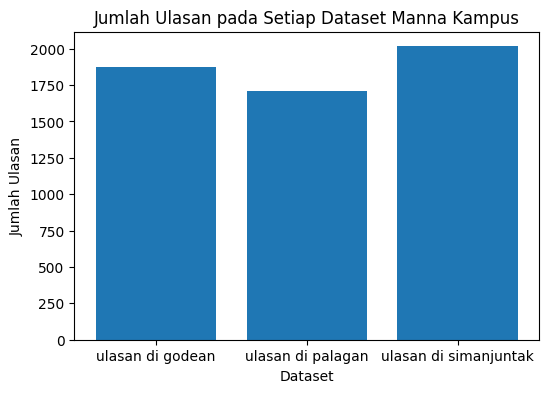

In [23]:
# Menampilkan jumlah data (baris) pada masing-masing dataset
jumlah_data = {
    "ulasan di godean": len(df1),
    "ulasan di palagan": len(df2),
    "ulasan di simanjuntak": len(df3)
}

# Tampilkan dalam bentuk DataFrame agar rapi
jumlah_df = pd.DataFrame.from_dict(
    jumlah_data, 
    orient='index', 
    columns=['Jumlah Ulasan']
)

# Reset index agar nama dataset menjadi kolom
jumlah_df.reset_index(inplace=True)
jumlah_df.columns = ['Dataset', 'Jumlah Ulasan']

print(jumlah_df)
plt.figure(figsize=(6,4))
plt.bar(jumlah_df['Dataset'], jumlah_df['Jumlah Ulasan'])
plt.title('Jumlah Ulasan pada Setiap Dataset Manna Kampus')
plt.xlabel('Dataset')
plt.ylabel('Jumlah Ulasan')
plt.show()


### WORDCLOUD MASING-MASING DATA SET

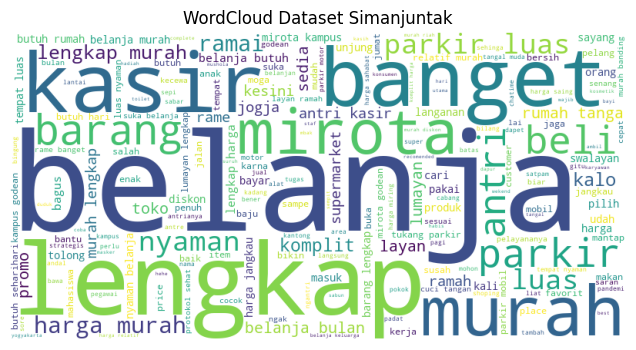

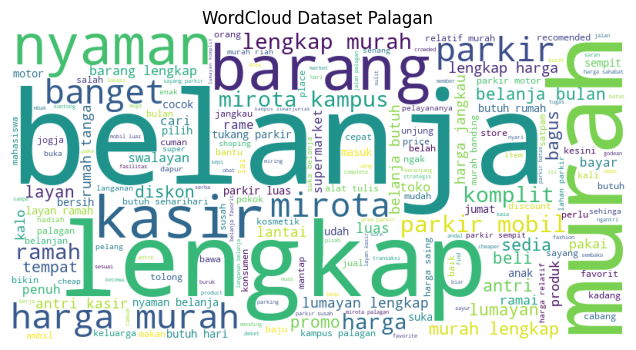

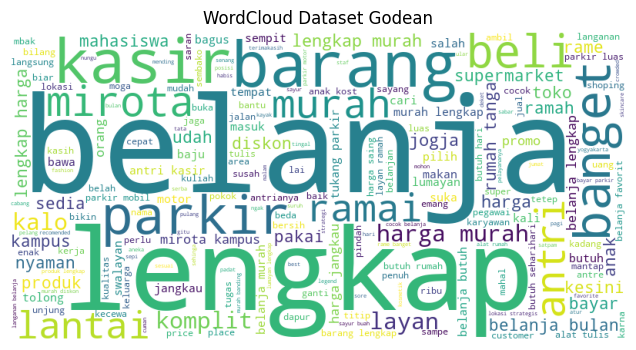

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ===============================
# FUNGSI WORDCLOUD
# ===============================
def tampilkan_wordcloud(teks, judul):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(teks)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(judul)
    plt.show()

# ===============================
# GABUNGKAN TEKS PER DATASET
# ===============================
teks_simanjuntak = ' '.join(df1['text_clean'].dropna())
teks_palagan = ' '.join(df2['text_clean'].dropna())
teks_godean = ' '.join(df3['text_clean'].dropna())

# ===============================
# TAMPILKAN WORDCLOUD
# ===============================
tampilkan_wordcloud(teks_simanjuntak, "WordCloud Dataset Simanjuntak")
tampilkan_wordcloud(teks_palagan, "WordCloud Dataset Palagan")
tampilkan_wordcloud(teks_godean, "WordCloud Dataset Godean")


In [4]:
# ===============================
# SIMPAN DATASET HASIL PREPROCESSING
# ===============================

# Simpan masing-masing dataset
df1.to_csv('dataset-simanjuntak-preprocessing.csv', index=False)
df2.to_csv('dataset-palagan-preprocessing.csv', index=False)
df3.to_csv('dataset-godean-preprocessing.csv', index=False)

print("Dataset hasil preprocessing berhasil disimpan:")
print("- dataset-simanjuntak-preprocessing.csv")
print("- dataset-palagan-preprocessing.csv")
print("- dataset-godean-preprocessing.csv")


Dataset hasil preprocessing berhasil disimpan:
- dataset-simanjuntak-preprocessing.csv
- dataset-palagan-preprocessing.csv
- dataset-godean-preprocessing.csv


### LEXICON BASED

In [5]:
# ===============================
# KAMUS LEXICON SENTIMEN
# ===============================

lexicon_positif = {
    "baik", "bagus", "ramah", "murah", "lengkap", "komplit",
    "cepat", "nyaman", "luas", "oke", "rekomendasi", "suka",
    "bersih", "enak", "mantap", "puas", "strategis",
    "cekatan", "mudah", "terjangkau", "tersedia"
}

lexicon_negatif = {
    # Umum
    "mahal", "lama", "antri", "antre", "panas", "dingin",
    "judes", "ketus", "kasar", "buruk", "jelek", "kecewa",
    "males", "susah", "ribet", "rusak", "error",
    "tidak", "ga", "gak", "nggak",
    "parah", "kacau", "sepi", "penuh",
    "aktif", "mati", "kosong",
    "lambat", "bosan", "capek", "kesal",
    "mengecewakan", "kurang", "minim",

    # Pelayanan & SDM
    "pelayanburuk", "pelayananburuk", "pelayananlambat",
    "karyawanjudes", "spgjudes", "pegawaijudes",
    "pegawai", "tidakramah", "cuek", "acuh",
    "jutek", "jutekbanget", "judesbanget",

    # Kasir & Antrian
    "kasirlama", "kasirtutup", "kasirkurang",
    "kasirtidakaktif", "kasirgakaktif",
    "antripanjang", "antreanpanjang",
    "nunggu", "nunggunya", "nunggupanjang",

    # Fasilitas
    "wifimati", "wifierror", "wifi", 
    "parkirsempit", "parkirsusah",
    "panasbanget", "acrusak", "acmati",
    "toiletkotor", "toiletrusak",
    "musholatidakada", "musholakecil",

    # Stok & Produk
    "stokhabis", "stokkurang", "stokkosong",
    "baranghabis", "barangkosong",
    "rakpenuh", "rakberantakan",

    # Sistem & Operasional
    "sistemerror", "sistembayarerror",
    "pembayaransusah", "pembayaranerror",
    "qrerror", "edcmati",
    "tidaktersedia", "belumtersedia",

    # Lokasi & Kenyamanan
    "ramai", "sumpek", "sesak",
    "berisik", "bau", "kotor",
    "panjang", "melelahkan"
}


In [6]:
# ===============================
# FUNGSI LABEL SENTIMEN
# ===============================
def label_sentimen(text):
    score = 0
    words = text.split()
    
    for word in words:
        if word in lexicon_positif:
            score += 1
        elif word in lexicon_negatif:
            score -= 1

    if score > 0:
        return "POSITIF"
    elif score < 0:
        return "NEGATIF"
    else:
        return "NETRAL"


In [7]:
# ===============================
# APPLY LABELING
# ===============================
df1['sentimen'] = df1['text_clean'].apply(label_sentimen)
df2['sentimen'] = df2['text_clean'].apply(label_sentimen)
df3['sentimen'] = df3['text_clean'].apply(label_sentimen)


In [8]:
print("Dataset Simanjuntak:")
display(df1[['text_clean', 'sentimen']].head())

print("\nDataset Palagan:")
display(df2[['text_clean', 'sentimen']].head())

print("\nDataset Godean:")
display(df3[['text_clean', 'sentimen']].head())


Dataset Simanjuntak:


text_clean  \
0                                                                                                                                                                                                                                                            cocok harga   
1                                                                                                                                                                                                                               barangkomplit harga saing sayang mushola   
2  kali dapet laku gaenak karyawan perempuan baju lantai baju baju orang kalo badmod dilampiasin customer wkwk gimanasi males kalo belanja kosmetik karna spgnya judes judes inget purbasari omonganya ketus banget naudzubilah gimanasih karyawanya evaluasi atitudenya   
3                                                                                                                                   manajemen mirota kampus godean tolong betul belanja panas dingin sedia self service kasa gapernah aktif bantu antri kasir buka antri   
4                                                                                                                                                                                                                                        harga murahklo tngal muda ramai   

  sentimen  
0   NETRAL  
1   NETRAL  
2  NEGATIF  
3  NEGATIF  
4  NEGATIF


Dataset Palagan:


text_clean  \
0                                                       luas layan ramah cekat   
1                                                                        promo   
2          suka belanja mirota tolong sedia wifi sana sinyal bayar pakai susah   
3  lengkap lengkap warga palagan oke belanja harianbulanan mirota tetap mirota   
4                                   tempat ramai kasir bayar antri cepet kasir   

  sentimen  
0  POSITIF  
1   NETRAL  
2  NEGATIF  
3  POSITIF  
4  NEGATIF


Dataset Godean:


text_clean  \
0                                                   jumat cheker rim suplier tumpuk   
1                                              belanja baik lengkap kota yogyakarta   
2  jaman kuliah belanja bulan skrng turis lokal tetep belanja cemilan lengkap murah   
3                                                                                     
4                                                                           komplit   

  sentimen  
0   NETRAL  
1  POSITIF  
2  POSITIF  
3   NETRAL  
4  POSITIF

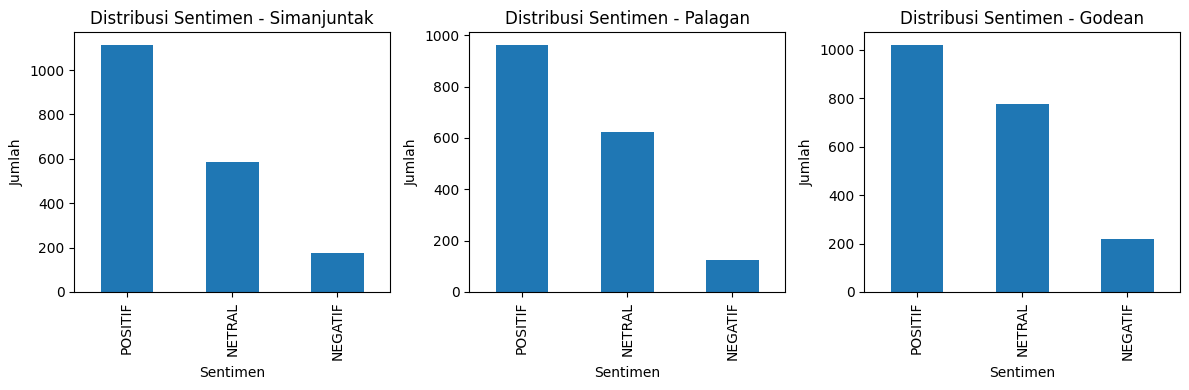

In [9]:
import matplotlib.pyplot as plt

datasets = {
    "Simanjuntak": df1,
    "Palagan": df2,
    "Godean": df3
}

plt.figure(figsize=(12,4))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)
    df['sentimen'].value_counts().plot(kind='bar')
    plt.title(f"Distribusi Sentimen - {name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


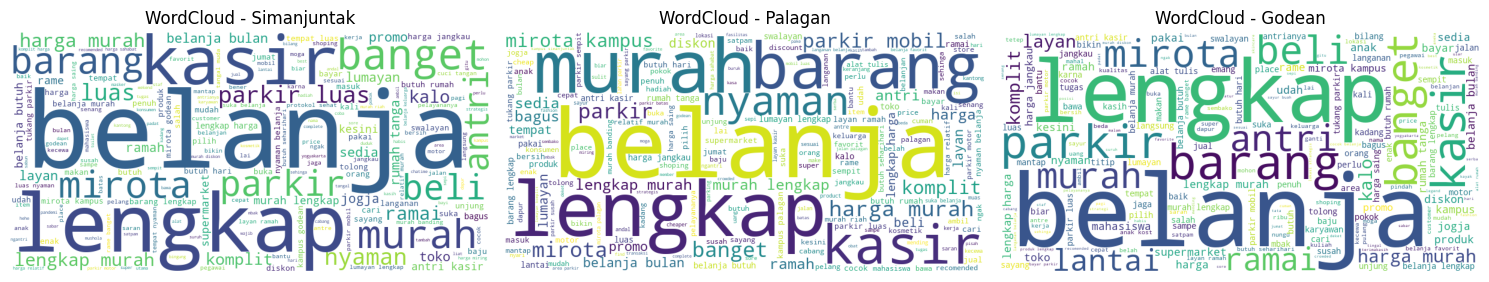

In [10]:
from wordcloud import WordCloud

plt.figure(figsize=(15,5))

for i, (name, df) in enumerate(datasets.items(), 1):
    text = " ".join(df['text_clean'].dropna())
    
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)
    
    plt.subplot(1, 3, i)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud - {name}")

plt.tight_layout()
plt.show()


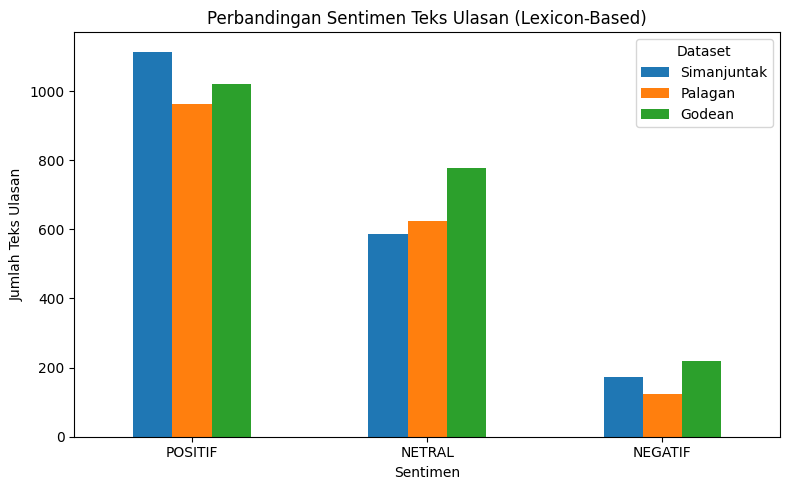

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung distribusi sentimen per dataset
simanjuntak_count = df1['sentimen'].value_counts()
palagan_count = df2['sentimen'].value_counts()
godean_count = df3['sentimen'].value_counts()

# Gabungkan ke dalam satu DataFrame
compare_df = pd.DataFrame({
    'Simanjuntak': simanjuntak_count,
    'Palagan': palagan_count,
    'Godean': godean_count
}).fillna(0)

# Plot grafik bar perbandingan
compare_df.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Perbandingan Sentimen Teks Ulasan (Lexicon-Based)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Teks Ulasan")
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()



WordCloud Dataset: Simanjuntak


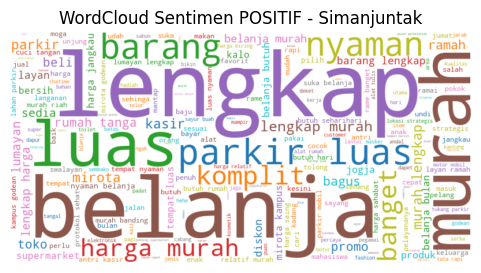

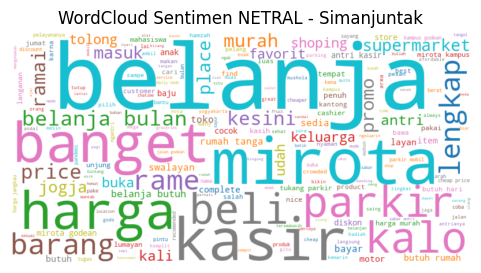

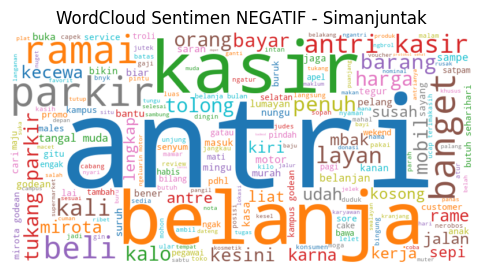


WordCloud Dataset: Palagan


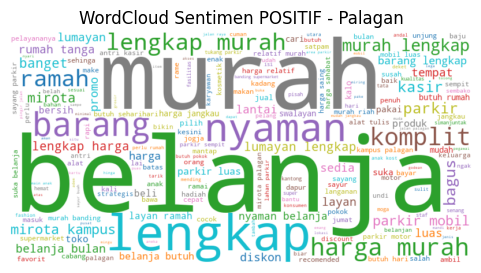

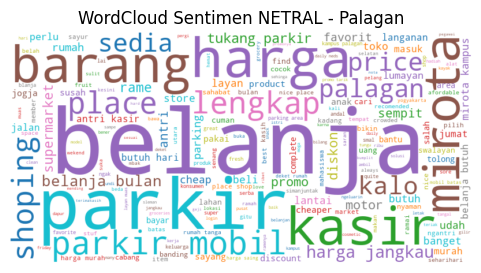

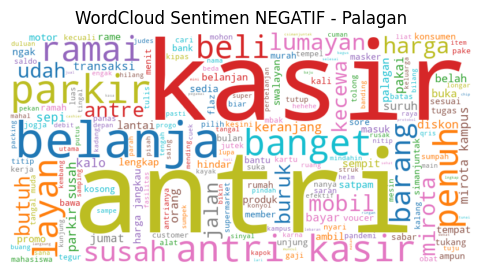


WordCloud Dataset: Godean


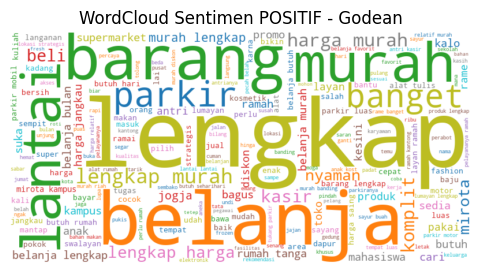

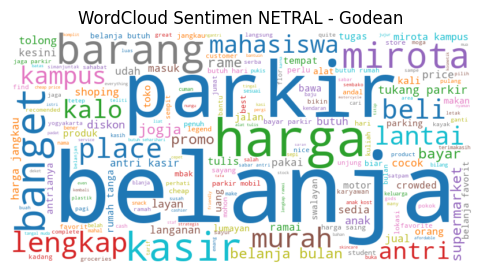

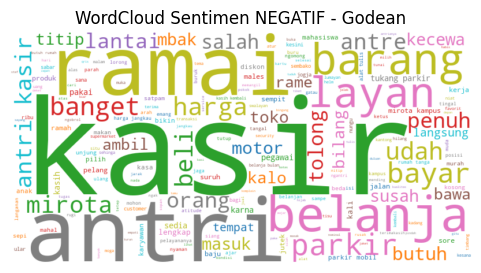

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ["POSITIF", "NETRAL", "NEGATIF"]

for dataset_name, df in datasets.items():
    print(f"\nWordCloud Dataset: {dataset_name}")
    
    for sent in sentiments:
        text_data = " ".join(df[df["sentimen"] == sent]["text_clean"].astype(str))
        
        if text_data.strip() == "":
            continue
        
        wc = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="tab10"
        ).generate(text_data)

        plt.figure(figsize=(6,3))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud Sentimen {sent} - {dataset_name}")
        plt.show()


### N-GRAM (BIGRAM)

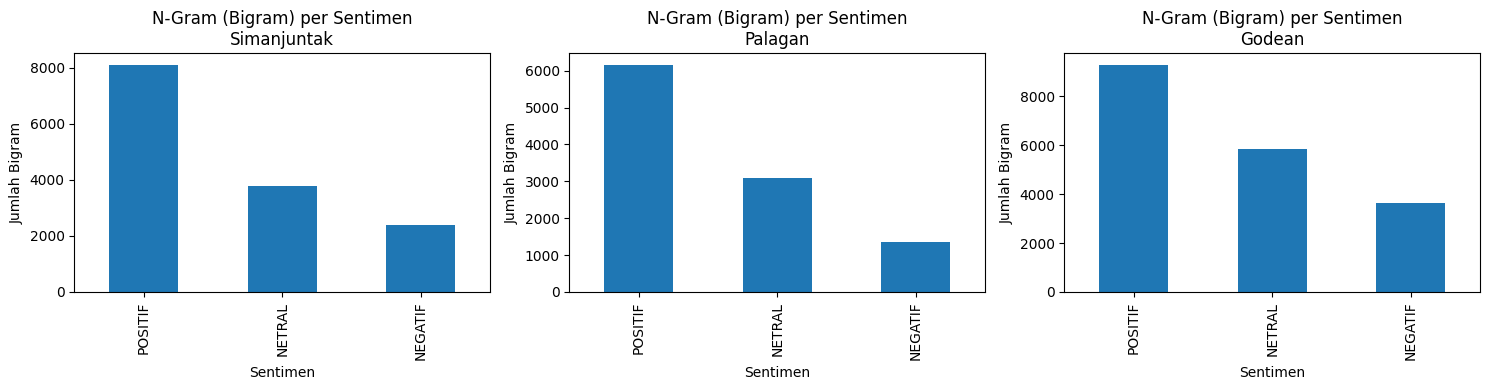

In [13]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

datasets = {
    "Simanjuntak": df1,
    "Palagan": df2,
    "Godean": df3
}

plt.figure(figsize=(15,4))

for i, (name, df) in enumerate(datasets.items(), 1):
    bigram_counts = {}

    for sent in ["POSITIF", "NETRAL", "NEGATIF"]:
        texts = df[df["sentimen"] == sent]["text_clean"].astype(str)

        if texts.empty:
            bigram_counts[sent] = 0
        else:
            vectorizer = CountVectorizer(ngram_range=(2,2))
            X = vectorizer.fit_transform(texts)
            bigram_counts[sent] = X.sum()

    plt.subplot(1, 3, i)
    pd.Series(bigram_counts).plot(kind='bar')
    plt.title(f"N-Gram (Bigram) per Sentimen\n{name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Bigram")

plt.tight_layout()
plt.show()


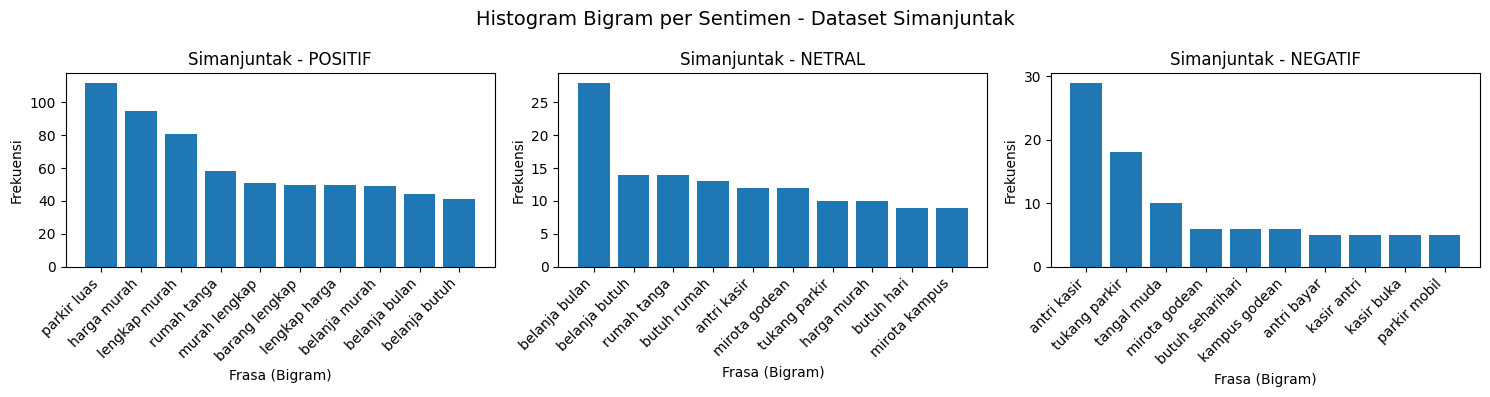

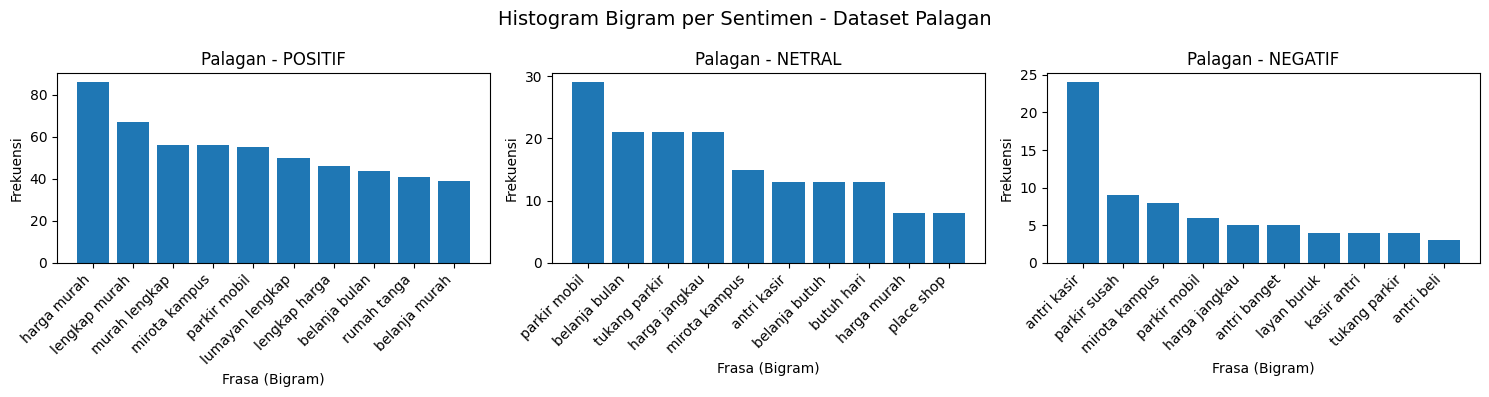

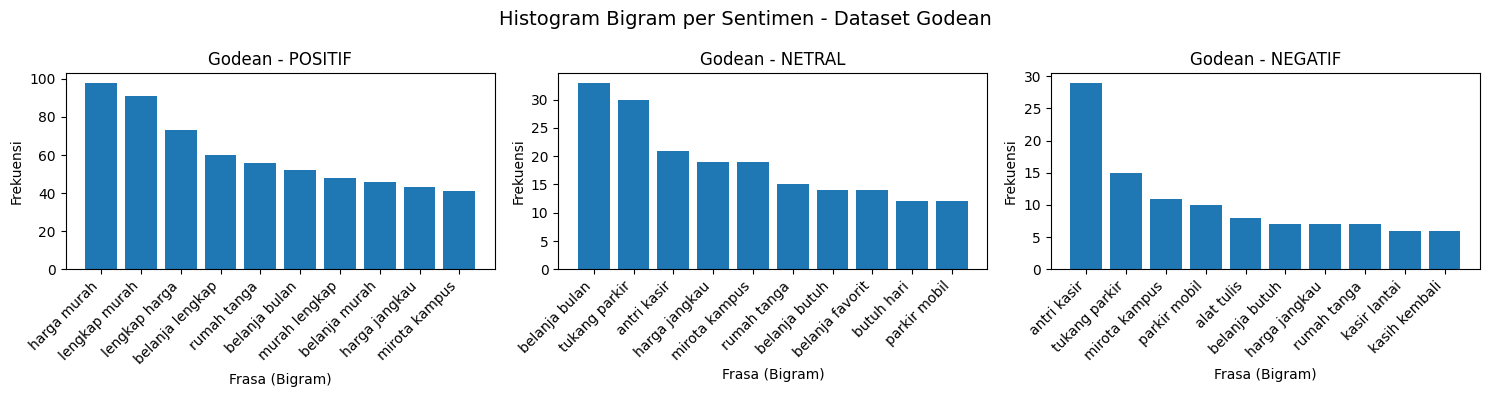

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

datasets = {
    "Simanjuntak": df1,
    "Palagan": df2,
    "Godean": df3
}

sentiments = ["POSITIF", "NETRAL", "NEGATIF"]

for dataset_name, df in datasets.items():
    plt.figure(figsize=(15,4))
    
    for i, sent in enumerate(sentiments, 1):
        texts = df[df["sentimen"] == sent]["text_clean"].astype(str)

        if texts.empty:
            continue

        vectorizer = CountVectorizer(ngram_range=(2,2), max_features=10)
        X = vectorizer.fit_transform(texts)

        bigram_freq = X.sum(axis=0).A1
        bigram_names = vectorizer.get_feature_names_out()

        bigram_df = pd.DataFrame({
            "Bigram": bigram_names,
            "Frekuensi": bigram_freq
        }).sort_values(by="Frekuensi", ascending=False)

        plt.subplot(1,3,i)
        plt.bar(bigram_df["Bigram"], bigram_df["Frekuensi"])
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{dataset_name} - {sent}")
        plt.xlabel("Frasa (Bigram)")
        plt.ylabel("Frekuensi")

    plt.suptitle(f"Histogram Bigram per Sentimen - Dataset {dataset_name}", fontsize=14)
    plt.tight_layout()
    plt.show()


### N-GRAM (TRIGRAM)

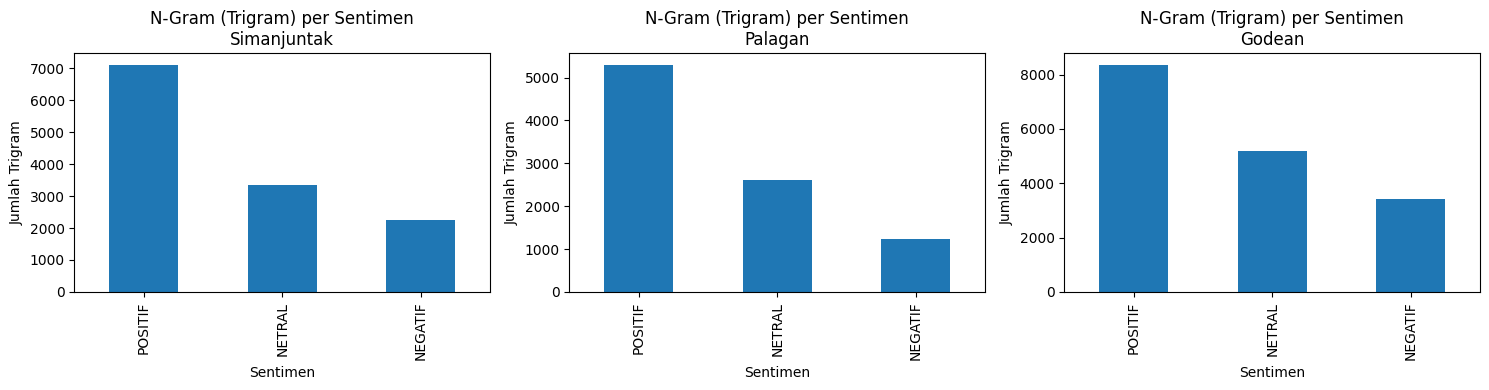

In [15]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

datasets = {
    "Simanjuntak": df1,
    "Palagan": df2,
    "Godean": df3
}

plt.figure(figsize=(15,4))

for i, (name, df) in enumerate(datasets.items(), 1):
    trigram_counts = {}

    for sent in ["POSITIF", "NETRAL", "NEGATIF"]:
        texts = df[df["sentimen"] == sent]["text_clean"].astype(str)

        if texts.empty:
            trigram_counts[sent] = 0
        else:
            # 🔹 TRIGRAM (3 kata)
            vectorizer = CountVectorizer(ngram_range=(3,3))
            X = vectorizer.fit_transform(texts)
            trigram_counts[sent] = X.sum()

    plt.subplot(1, 3, i)
    pd.Series(trigram_counts).plot(kind='bar')
    plt.title(f"N-Gram (Trigram) per Sentimen\n{name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Trigram")

plt.tight_layout()
plt.show()


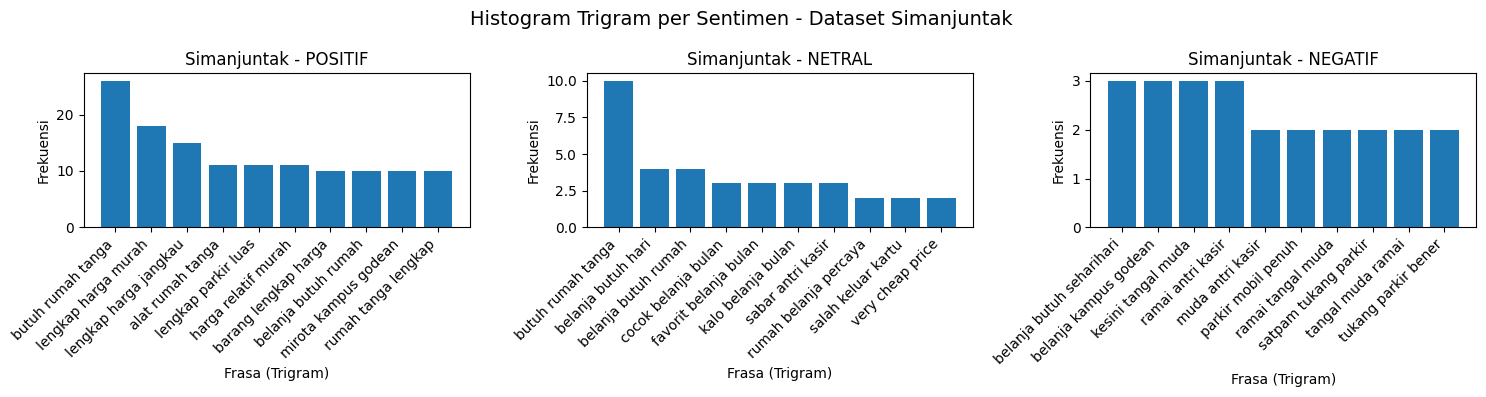

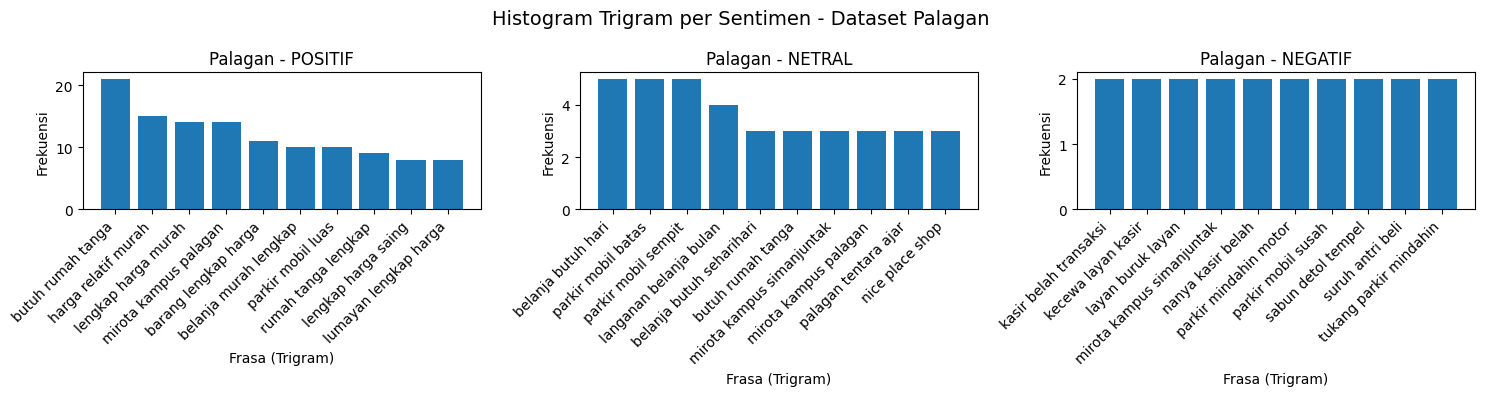

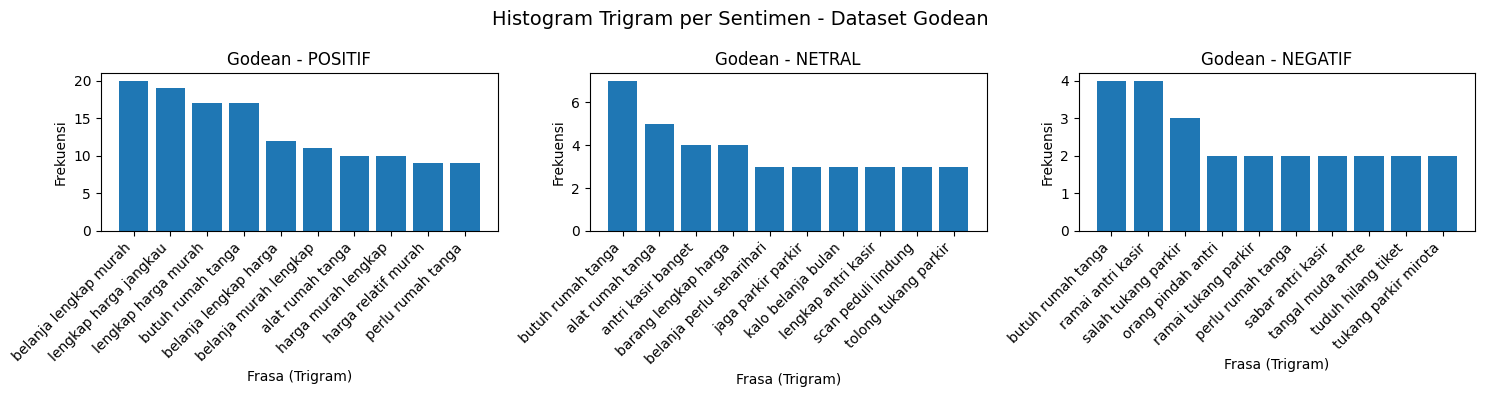

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

datasets = {
    "Simanjuntak": df1,
    "Palagan": df2,
    "Godean": df3
}

sentiments = ["POSITIF", "NETRAL", "NEGATIF"]

for dataset_name, df in datasets.items():
    plt.figure(figsize=(15,4))
    
    for i, sent in enumerate(sentiments, 1):
        texts = df[df["sentimen"] == sent]["text_clean"].astype(str)

        if texts.empty:
            continue

        # 🔹 TRIGRAM (3 kata)
        vectorizer = CountVectorizer(ngram_range=(3,3), max_features=10)
        X = vectorizer.fit_transform(texts)

        trigram_freq = X.sum(axis=0).A1
        trigram_names = vectorizer.get_feature_names_out()

        trigram_df = pd.DataFrame({
            "Trigram": trigram_names,
            "Frekuensi": trigram_freq
        }).sort_values(by="Frekuensi", ascending=False)

        plt.subplot(1,3,i)
        plt.bar(trigram_df["Trigram"], trigram_df["Frekuensi"])
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{dataset_name} - {sent}")
        plt.xlabel("Frasa (Trigram)")
        plt.ylabel("Frekuensi")

    plt.suptitle(
        f"Histogram Trigram per Sentimen - Dataset {dataset_name}",
        fontsize=14
    )
    plt.tight_layout()
    plt.show()
